In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV++/YOLOv5+Blur/yolov5-blur

/content/drive/MyDrive/CV++/YOLOv5+Blur/yolov5-blur


In [ ]:
!git clone https://github.com/tpt149/yolov5-blur  # clone repo

Cloning into 'yolov5-blur'...
remote: Enumerating objects: 12371, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 12371 (delta 18), reused 13 (delta 4), pack-reused 12324
Receiving objects: 100% (12371/12371), 14.06 MiB | 15.08 MiB/s, done.
Resolving deltas: 100% (8198/8198), done.


In [3]:
%pip install -qr requirements.txt # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [4]:
import os
import cv2
import imutils
import torch
import glob

from google.colab.patches import cv2_imshow
from IPython.display import Image, display, clear_output  # to display images


print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


In [ ]:
!python train.py --weights yolov5l.pt --img 640 --batch-size -1 --epochs 1000 --data /content/drive/MyDrive/CV++/datasets/license_plate-4/data.yaml  --cache 

train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/CV++/datasets/license_plate-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 3699, done.
remote: Counting objects: 100% (3506/3506), done.
remote: Compressing objects: 100% (1089/1089), done.
remote: Total 3359 (delta 2557), reused 3048 (delta 2268), pack-reused 0
Receiving objects: 100% (3359/3359), 425.63 KiB | 6.35 MiB/s, done.
Resolving deltas: 100% (2557/2557), completed with 60 local objects.
From ht

In [ ]:
!python train.py --resume /content/drive/MyDrive/CV++/YOLOv5+Blur/yolov5-blur/runs/train/exp/weights/last.pt

train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/CV++/YOLOv5+Blur/yolov5-blur/runs/train/exp/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch ultralytics' timed out after 5 seconds
YOLOv5 🚀 v7.0-177-g87b9d75 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/drive/MyDrive/CV++/datasets/license_plate-4/data.yaml --task val --iou-thres 0.5

val: data=/content/drive/MyDrive/CV++/datasets/license_plate-4/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-177-g87b9d75 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
100% 755k/755k [00:00<00:00, 108MB/s]
val: Scanning /content/drive/MyDrive/CV++/datasets/license_plate-4/valid/labels.cache... 679 images, 0 backgrounds, 0 corrupt: 100% 679/679 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50      mAP75   mAP50-95: 100% 22/22 [00:36<00:00,  1.67s/it]
                   all        679        868      0.902      0.929      0.964      0

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/drive/MyDrive/CV++/datasets/license_plate-4/data.yaml --task test --iou-thres 0.5

val: data=/content/drive/MyDrive/CV++/datasets/license_plate-4/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-177-g87b9d75 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning /content/drive/MyDrive/CV++/datasets/license_plate-4/test/labels... 347 images, 0 backgrounds, 0 corrupt: 100% 347/347 [03:45<00:00,  1.54it/s]
test: New cache created: /content/drive/MyDrive/CV++/datasets/license_plate-4/test/labels.cache
                 Class     Images  Instances          P          R      mAP50      mAP75   mAP50-95: 100% 11/11 [00:16<00:00,  1.47s/it]
                   all 

In [12]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV++/test.png

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV++/test.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, censor=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-177-g87b9d75 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/drive/MyDrive/CV++/test.png: 512x640 1 bien_so, 49.7ms
Speed: 0.6ms pre-process, 49.7ms inference, 77.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


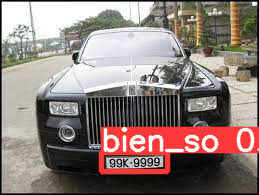

In [13]:
display(Image(filename='runs/detect/exp3/test.png'))

In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV++/test.png --censor

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV++/test.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, censor=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-177-g87b9d75 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/drive/MyDrive/CV++/test.png: 512x640 1 bien_so, 74.7ms
Speed: 0.7ms pre-process, 74.7ms inference, 103.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


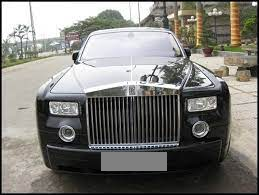

In [15]:
display(Image(filename='runs/detect/exp/test.png'))

In [16]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/drive/MyDrive/CV++/f1c1aca11a25c47b9d34.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/CV++/f1c1aca11a25c47b9d34.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, censor=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-177-g87b9d75 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/drive/MyDrive/CV++/f1c1aca11a25c47b9d34.jpg: 448x640 3 bien_sos, 71.2ms
Speed: 0.8ms pre-process, 71.2ms inference, 122.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


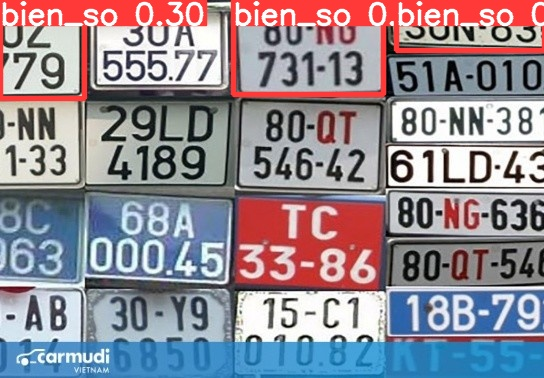

In [17]:
display(Image(filename='runs/detect/exp2/f1c1aca11a25c47b9d34.jpg'))